In [2]:
%matplotlib inline
from importlib import reload
from pathlib import Path
import time

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 20)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', palette='muted')

import TreeMazeAnalyses2.Analyses.tree_maze_functions as tmf
from TreeMazeAnalyses2.Analyses import subject_info as si

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [3]:
# Summary data path
summary_data_path_gd =  Path("/home/alexgonzalez/google-drive/TreeMazeProject/Results_Summary/")
summary_data_path_local = Path("/mnt/Data_HD2T/SummaryData/")
subjects = ['Li', 'Ne', 'Cl', 'Al', 'Ca', 'Mi']

# run and get behavior and event data for every session

In [3]:
%%time
if True:
    for subject in subjects:
        subject_info = si.SubjectInfo(subject, overwrite=True)

Error Computing Cluster Stats for Li_OF_052818
CPU times: user 44 s, sys: 2.85 s, total: 46.8 s
Wall time: 47.8 s


In [4]:
%%time
interrupt_flag = False
overwrite_analysis_flag = False
perf = pd.DataFrame()
verbose = False

if True:
    for subject in subjects:
        if not interrupt_flag:
            subject_info = si.SubjectInfo(subject)
            for session in subject_info.sessions:
                try:
                    if 'T3' in session:
                        if verbose:
                            t0=time.time()
                            print(f'Processing Session {session}')
                        session_info = si.SubjectSessionInfo(subject, session)
                        #session_info.run_analyses(overwrite=overwrite_flag)
                        b = session_info.get_event_behavior(overwrite_analysis_flag)
                        sp = b.get_session_perf()

                        sp['session'] = session
                        sp['task'] = session_info.task
                        sp['subject'] = subject
                        sp['n_units'] = session_info.n_units
                        sp['n_cells'] = session_info.n_cells
                        sp['n_mua'] = session_info.n_mua
                        
                        perf = pd.concat((perf, sp), ignore_index=True)
                        if verbose:
                            t1 = time.time()
                            print(f"Session Processing Completed: {t1-t0:0.2f}s")
                            print()
                        else:
                            print(".",end='')
                except KeyboardInterrupt:
                    interrupt_flag = True
                    break
                except ValueError:
                    pass
                except FileNotFoundError:
                    pass
                except:
                    pass

fn = 'behavior_session_perf.csv'
perf.to_csv(summary_data_path_local/fn)
perf.to_csv(summary_data_path_gd/fn)

................................................................Tetrode 1 information not found.
.....Tetrode 1 information not found.
Tetrode 1 information not found.
...Tetrode 1 information not found.
.Tetrode 1 information not found.
Tetrode 1 information not found.
Tetrode 1 information not found.
Tetrode 1 information not found.
..Tetrode 1 information not found.
.Tetrode 1 information not found.
Tetrode 1 information not found.
.............Tetrode 1 information not found.
....Tetrode 1 information not found.
Tetrode 1 information not found.
.Tetrode 1 information not found.
Tetrode 1 information not found.
Tetrode 1 information not found.
.Tetrode 1 information not found.
Tetrode 1 information not found.
.Tetrode 1 information not found.
.....Tetrode 1 information not found.
....Tetrode 1 information not found.
..Tetrode 1 information not found.
Tetrode 1 information not found.
Tetrode 1 information not found.
.Tetrode 1 information not found.
Tetrode 1 information not found.
T

In [29]:
np.where(session_info.channel_table.loc['Mi_OF_123019'])[0]

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [7]:
fn = 'behavior_session_perf.csv'
perf = pd.read_csv(summary_data_path_local/fn, index_col=0)

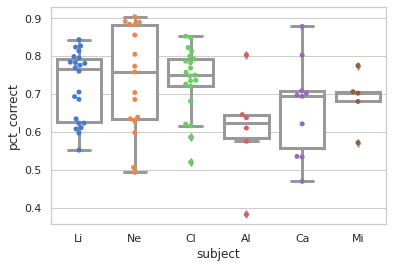

In [5]:
min_n_units = 1
min_n_trials = 50

subset = perf[(perf.n_units>=min_n_units) & (perf.n_trials>=min_n_trials)]
sns.boxplot(x='subject', y='pct_correct',data=subset, color='w', linewidth=3)
sns.swarmplot(x='subject', y='pct_correct',data=subset)

In [13]:
perf.groupby('subject').get_group('Al')

,n_trials,n_sw_trials,n_vsw_trials,n_L_trials,n_R_trials,pct_correct,pct_sw_correct,pct_vsw_correct,pct_L_correct,pct_R_correct,session,task,subject,n_units,n_cells,n_mua
83,19,11,5,10,9,0.473684,0.636364,0.600000,0.200000,0.777778,Al_T3g_092618,T3g,Al,6,3,3
84,38,17,11,19,19,0.552632,0.647059,0.727273,0.421053,0.684211,Al_T3g_092718,T3g,Al,20,10,10
85,35,12,5,10,25,0.514286,0.583333,0.800000,0.500000,0.520000,Al_T3g_092818,T3g,Al,14,7,7
86,80,39,23,40,40,0.575000,0.641026,0.695652,0.575000,0.575000,Al_T3g_100318,T3g,Al,0,0,0
87,91,44,27,43,48,0.637363,0.750000,0.925926,0.604651,0.666667,Al_T3g_100418,T3g,Al,0,0,0
88,36,20,11,14,22,0.500000,0.450000,0.363636,0.785714,0.318182,Al_T3g_100518,T3g,Al,0,0,0
89,79,33,22,38,41,0.645570,0.606061,0.636364,0.710526,0.585366,Al_T3g_101018,T3g,Al,2,1,1
90,55,23,11,17,38,0.381818,0.565217,0.454545,0.764706,0.210526,Al_T3g_101518,T3g,Al,0,0,0
91,72,37,21,35,37,0.513889,0.459459,0.238095,0.828571,0.216216,Al_T3g_101618,T3g,Al,0,0,0
92,31,10,5,6,25,0.290323,0.500000,0.000000,1.000000,0.120000,Al_T3g_101718,T3g,Al,2,1,1


In [9]:
perf.groupby('subject').get_group('Al')

,n_trials,n_sw_trials,n_vsw_trials,n_L_trials,n_R_trials,pct_correct,pct_sw_correct,pct_vsw_correct,pct_L_correct,pct_R_correct,session,task,subject,n_units,n_cells,n_mua
83,19,11,5,10,9,0.473684,0.636364,0.600000,0.200000,0.777778,Al_T3g_092618,T3g,Al,6,3,3
84,38,17,11,19,19,0.552632,0.647059,0.727273,0.421053,0.684211,Al_T3g_092718,T3g,Al,20,10,10
85,35,12,5,10,25,0.514286,0.583333,0.800000,0.500000,0.520000,Al_T3g_092818,T3g,Al,14,7,7
86,80,39,23,40,40,0.575000,0.641026,0.695652,0.575000,0.575000,Al_T3g_100318,T3g,Al,0,0,0
87,91,44,27,43,48,0.637363,0.750000,0.925926,0.604651,0.666667,Al_T3g_100418,T3g,Al,0,0,0
88,36,20,11,14,22,0.500000,0.450000,0.363636,0.785714,0.318182,Al_T3g_100518,T3g,Al,0,0,0
89,79,33,22,38,41,0.645570,0.606061,0.636364,0.710526,0.585366,Al_T3g_101018,T3g,Al,2,1,1
90,55,23,11,17,38,0.381818,0.565217,0.454545,0.764706,0.210526,Al_T3g_101518,T3g,Al,0,0,0
91,72,37,21,35,37,0.513889,0.459459,0.238095,0.828571,0.216216,Al_T3g_101618,T3g,Al,0,0,0
92,31,10,5,6,25,0.290323,0.500000,0.000000,1.000000,0.120000,Al_T3g_101718,T3g,Al,2,1,1


In [12]:
session_info = si.SubjectSessionInfo('Al', 'Al_T3g_092718')

In [20]:
session_info.clusters

{'session': 'Al_T3g_092718',
 'path': '/mnt/Data3_SSD2T/Data/Sorted/Al/Al_T3g_092718',
 'n_cell': 10,
 'n_mua': 18,
 'n_noise': 87,
 'n_unsorted': 140,
 'sorted_TTs': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 'curated_TTs': [2, 3, 4, 6, 11, 12, 13, 14],
 'cell_IDs': {2: [7, 18],
  3: [5, 9, 10],
  4: [10, 19],
  5: [],
  6: [],
  7: [],
  8: [],
  9: [],
  10: [],
  11: [1],
  12: [18],
  13: [16],
  14: [],
  15: [],
  16: []},
 'mua_IDs': {2: [4, 5, 8],
  3: [0, 2, 3, 4, 6],
  4: [12],
  5: [],
  6: [3],
  7: [],
  8: [],
  9: [],
  10: [],
  11: [0, 11, 12, 13, 14],
  12: [2, 10, 14],
  13: [],
  14: [],
  15: [],
  16: []},
 'noise_IDs': {2: [1, 6, 9, 10, 11, 12, 13, 14, 15, 16],
  3: [1, 7, 8, 11, 12, 13, 14, 15],
  4: [0, 1, 2, 3, 4, 5, 6, 8, 11, 13, 14, 15, 16, 17, 18],
  5: [],
  6: [1, 2, 9, 12],
  7: [],
  8: [],
  9: [],
  10: [],
  11: [2, 3, 4, 5, 6, 7, 8, 9, 10, 15],
  12: [0, 1, 3, 4, 5, 8, 9, 11, 12, 13, 16],
  13: [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1